# Real-World Data Example

Here, we look at a new dataset and try to answer some questions about it.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/iowa_liquor/Iowa_Liquor_Sales.csv', index_col=0)

In [4]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [5]:
df.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number                int64
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

## Data cleaning and preparation
Before we can begin the analysis, we need to prepare our data. 
For our dataset here, this means making sure that any columns we need to use in calculations are in numeric format.

In [6]:
# removing dollar signs so that columns can be converted to numeric
df = df.replace('\$', '', regex=True)
# removing commas in 1000s
df = df.replace(',','', regex=True)

In [7]:
# making list of columns to switch to numeric format
columns_to_numeric = ['Sale (Dollars)', 'State Bottle Cost', 'State Bottle Retail']

for column in columns_to_numeric:
    df.loc[:, column] = pd.to_numeric(df.loc[:, column])

/var/folders/ly/xplb9t650k9cxqh9lfw7mq540000gn/T/ipykernel_29226/3396359805.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = pd.to_numeric(df.loc[:, column])


## Analysis Questions
Answer these questions using the pandas skills you've learned in the previous sections.
Keep in mind that there are often many ways to arrive at the same answer.

1) Which store had the highest total dollars of sales?
    - Is this the same store that had the highest volume (in liters) of alcohol sold?

In [8]:
store_sales = df.groupby('Store Name').sum()

# finding highest by sale in dollars
highest_sale_dollars = store_sales.loc[:, 'Sale (Dollars)'].idxmax()

# finding highest by volume in liters 
highest_volume_liters = store_sales.loc[:, 'Volume Sold (Liters)'].idxmax()

print('Store with highest total dollar sales is: {}'.format(highest_sale_dollars))
print('Store with highest volume in liters is: {}'.format(highest_volume_liters))

Store with highest total dollar sales is: Hy-Vee #3 / BDI / Des Moines
Store with highest volume in liters is: Hy-Vee #3 / BDI / Des Moines


/var/folders/ly/xplb9t650k9cxqh9lfw7mq540000gn/T/ipykernel_29226/2479892043.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_sales = df.groupby('Store Name').sum()


2) Which purchase (by Invoice Number) was the most expensive?
- What was the total cost of the invoice? (Use Sale (Dollars) column)

In [9]:
purchases = df.groupby('Invoice/Item Number').sum()
purchases.loc[:,'Sale (Dollars)'].idxmax()

/var/folders/ly/xplb9t650k9cxqh9lfw7mq540000gn/T/ipykernel_29226/3112783510.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  purchases = df.groupby('Invoice/Item Number').sum()


'S24494900001'

In [10]:
purchases.loc[:,'Sale (Dollars)'].max()

41042.64

3) What is the most expensive item? Use the average 'State Bottle Retail' to find this.
- How much does the bottle cost, on average?

In [11]:
bottles = df.groupby('Item Description').mean()
bottles.loc[:, 'State Bottle Retail'].idxmax()

/var/folders/ly/xplb9t650k9cxqh9lfw7mq540000gn/T/ipykernel_29226/3724941270.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bottles = df.groupby('Item Description').mean()


'Macallan Sherry Cask 25 Year Old Scotch - HA'

In [12]:
bottles.loc[:, 'State Bottle Retail'].max()

845.1

4) What is the most commonly sold item?

In [13]:
bottles = df.groupby('Item Description').count()
bottles.loc[:,'Invoice/Item Number'].idxmax()

'Black Velvet'

5) What day in 2015 was the most money made? (Across all stores)

In [14]:
df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])

/var/folders/ly/xplb9t650k9cxqh9lfw7mq540000gn/T/ipykernel_29226/1247694803.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])


In [15]:
year_2015_df = df.loc[df['Date'].dt.year == 2015]

In [16]:
days_2015_totals = year_2015_df.groupby('Date').sum()
days_2015_totals.loc[:, 'Sale (Dollars)'].idxmax()

/var/folders/ly/xplb9t650k9cxqh9lfw7mq540000gn/T/ipykernel_29226/3158372686.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  days_2015_totals = year_2015_df.groupby('Date').sum()


Timestamp('2015-03-16 00:00:00')

6) Which zip code drinks the most? (in liters)

In [17]:
zipcode_totals = df.groupby('Zip Code').sum()
zipcode_totals.loc[:, 'Volume Sold (Liters)'].idxmax()

/var/folders/ly/xplb9t650k9cxqh9lfw7mq540000gn/T/ipykernel_29226/230791174.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  zipcode_totals = df.groupby('Zip Code').sum()


'52402'

7) Does the data set contain any null values?

In [18]:
df.isnull().any().any()

True

8) What is the average state bottle cost?
    - Max cost?
    - Min cost?
    - 50%?

In [19]:
df.loc[:, 'State Bottle Cost'].describe()

count    100000.000000
mean          9.455181
std           6.787500
min           0.000000
25%           5.490000
50%           7.870000
75%          11.540000
max         563.400000
Name: State Bottle Cost, dtype: float64

9) What is the total volume sold in Iowa City in 2013?

In [20]:
year_2013_iowa_city = df.loc[(df['Date'].dt.year == 2013) & (df['City'] == 'IOWA CITY')]
year_2013_iowa_city.loc[:, 'Volume Sold (Liters)'].sum()

9063.01

10) Which month (average, across all years) sees the highest sales?

In [21]:
months = df.groupby(df['Date'].dt.month).mean()
months.loc[:, 'Sale (Dollars)'].idxmax()

/var/folders/ly/xplb9t650k9cxqh9lfw7mq540000gn/T/ipykernel_29226/2272015896.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  months = df.groupby(df['Date'].dt.month).mean()


10

12) What is the most popular item (most bottles sold) at Wilkie Liquors?

In [22]:
wilkie = df.loc[df['Store Name'] == 'Wilkie Liquors']
wilkie_items = wilkie.groupby('Item Description').sum()
wilkie_items.loc[:, 'Bottles Sold'].idxmax()

/var/folders/ly/xplb9t650k9cxqh9lfw7mq540000gn/T/ipykernel_29226/3254748431.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wilkie_items = wilkie.groupby('Item Description').sum()


'Juarez Gold Dss'

13) From which item does Wilkie Liquors earn the most of its revenue?

In [23]:
wilkie_items.loc[:, 'Sale (Dollars)'].idxmax()

'Juarez Gold Dss'

14) What was the most expensive bottle sold in Des Moines in 2012?
- How much did it cost?

In [24]:
year_2012_des_moines = df.loc[(df['Date'].dt.year == 2012) & (df['City'] == 'DES MOINES')]
year_2012_des_moines_bottles = year_2012_des_moines.groupby('Item Description').max()
year_2012_des_moines_bottles.loc[:, 'State Bottle Retail'].idxmax()

'Johnnie Walker Blue'

In [25]:
year_2012_des_moines_bottles.loc[:, 'State Bottle Retail'].max()

193.49

15) Which store sold the most bottles of liquor in the city of Des Moines? (Over the entire time period for which we have data)

In [26]:
des_moines_total = df.loc[(df['City'] == 'DES MOINES')]
des_moines_stores = des_moines_total.groupby('Store Name').sum()
des_moines_stores.loc[:, 'Bottles Sold'].idxmax()

/var/folders/ly/xplb9t650k9cxqh9lfw7mq540000gn/T/ipykernel_29226/3277741107.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  des_moines_stores = des_moines_total.groupby('Store Name').sum()


'Hy-Vee #3 / BDI / Des Moines'

16) Make a plot about at least one of these questions:

In [27]:
import matplotlib.pyplot as plt 

/var/folders/ly/xplb9t650k9cxqh9lfw7mq540000gn/T/ipykernel_29226/1411967078.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bottles = df.groupby('Item Description').mean()
/var/folders/ly/xplb9t650k9cxqh9lfw7mq540000gn/T/ipykernel_29226/1411967078.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


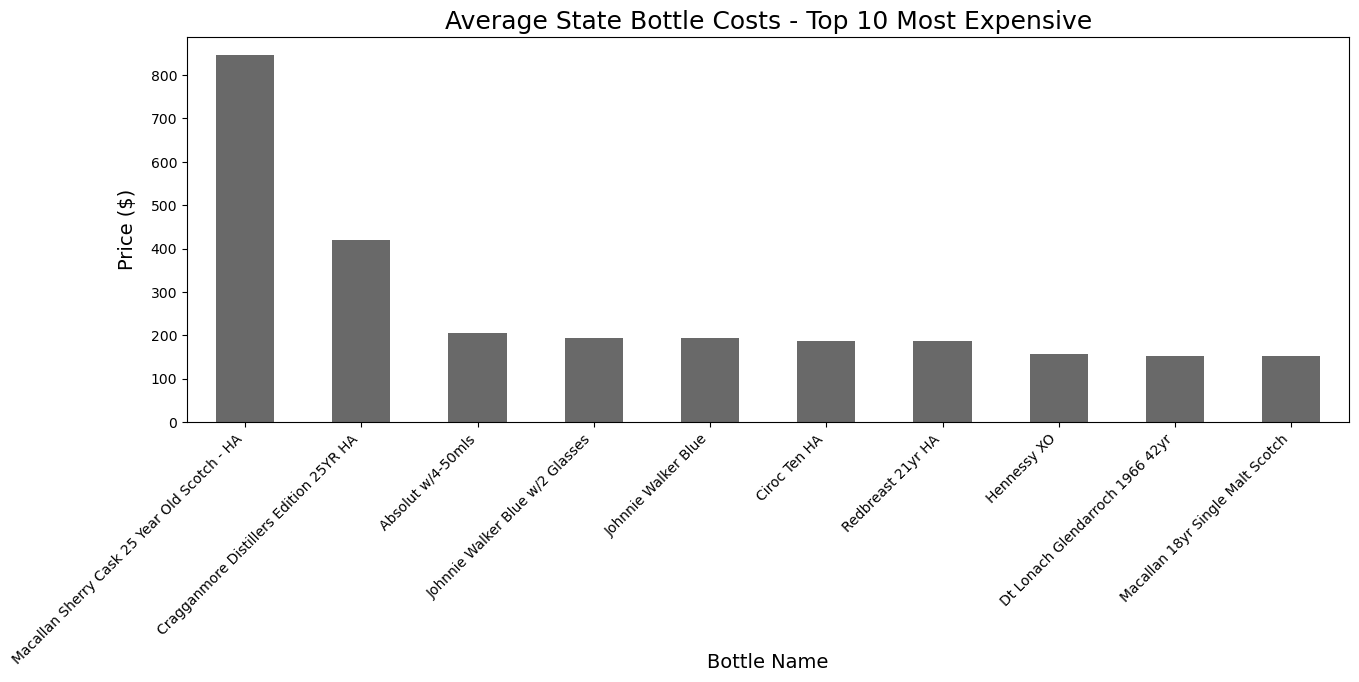

In [28]:
# example graph from Question #3:

# making sample dataset to plot
fig, ax = plt.subplots(1,1, figsize=(15,5))
bottles = df.groupby('Item Description').mean()
to_plot = pd.DataFrame(bottles.loc[:, 'State Bottle Retail'].sort_values(ascending=False))

plot = to_plot.loc[:, 'State Bottle Retail'].head(10).plot(ax=ax, color='dimgrey', kind='bar')

# Add some text for labels, title and custom x-axis tick labels, etc.
plot.set_ylabel('Price ($)', fontsize=14)
plot.set_xlabel('Bottle Name', fontsize=14)
plot.yaxis.labelpad = 10
plot.xaxis.labelpad = -10
ax.set_title('Average State Bottle Costs - Top 10 Most Expensive', fontsize=18)
ax.set_xticklabels(to_plot.loc[:, 'State Bottle Retail'].head(10).index, rotation=45, ha='right')

fig.show();